###                                    TERM PROJECT ON:
#                    Buckling of a Simply Supported Rectangular Plate under Bending and Compression

 __INTRODUCTION__ <br>
Steel plates are widely used in buildings, bridges, automobile, ships etc. and unlike beams which  have lengths longer than the other two dimensions and so are modeled as linear members, steel plates have widths comparable to their lengths and so are modeled as two-dimensional plane members. These plates undergo instability in the form of buckling and tends to buckle out of their plane under membrane compression. This buckled shape depends on loading and support conditions in both length and width.<br>
In this work we aim to find critical loading for a simply suported rectangular plate under both compression and bending.

__Problem Statement__<br>
A simply supported rectangular plate (on all sides) (Fig.1) is considered with axes as shown. The distributed forces are shown in Fig.1 along the sides x=0 and x=a. The distributed force is acting in the middle plane of the plate , the intensity of the applied forces is given by<br><br>
$$N_x = N_o(1-\frac{\alpha y}{b}) \tag{a}$$<br>
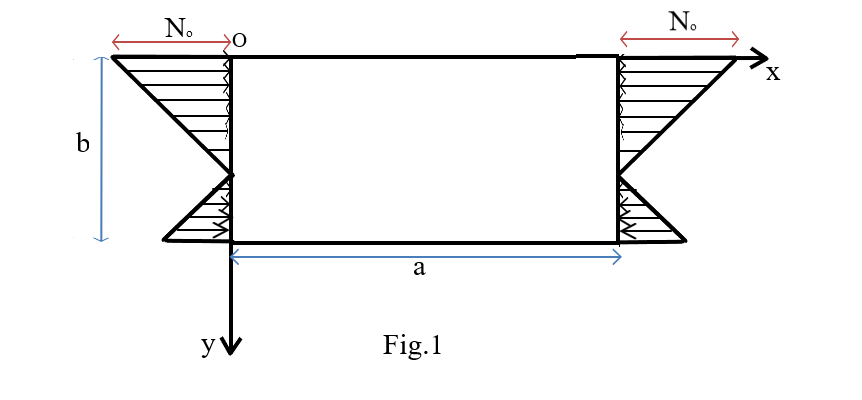<br>
where,<br>
$N_o$ is the intensity of compressive force at the edge y = 0 and $\alpha$ is a numerical factor. By changing the value for $\alpha$ we can obtain particular cases, for example for $\alpha$=0 we obtain UDL compressive force, for $\alpha$=2 we have Pure bending.<br> If α<0 we have a combination of bending and compression and if α>0, there will be a similar combination of bending and tension.<br>
Our aim is to 

In [1]:
import sympy as sym

The Föppl-von Kármán first equation is<br>
$$D\nabla^4 w = q + N_x\frac{\partial^2{w}}{\partial x^2} + N_y\frac{\partial^2{w}}{\partial y^2} -2N_{xy}\frac{\partial^2{w}}{\partial x\partial y} \tag{1}$$
For our uniaxial comperssion problem we have $N_{xy}=0 , N_y=0$ and q=0<br>
Hence our governing equation is given as <br>
$$D\nabla^4 w = N_x\frac{\partial^2{w}}{\partial x^2} \tag{2}$$

The deflection of the buckled plate simply supported on all sides can be
taken in the form of the double trigonometric series
$$w = \sum\limits_{m=1} ^{\infty}\sum\limits_{n=1} ^{\infty}a_{mn}\sin\frac{m\pi x}{a}\sin\frac{n\pi y}{b}$$<br>
We assume m half-waves along x-axis hence the deflection of plate expression becomes<br>
$$w = \sum\limits_{n=1} ^{\infty}\sin\frac{m\pi x}{a}a_{mn}\sin\frac{n\pi y}{b} \tag{3}$$<br>

Defining deflection of buckled plate $w$

In [2]:
D, Nx,No, x, y = sym.symbols('D,N_x,N_o,x,y')
a,b = sym.symbols('a,b',positive=True)
Amn,m,n = sym.symbols('a_mn,m,n')
w = Amn*sym.sin(m*sym.pi*x/a)*sym.sin(n*sym.pi*y/b)
from IPython.display import Math
display(Math(r'w = \sum\limits_{{n=1}} ^{{\infty}} {}'.format(sym.latex(w))))

<IPython.core.display.Math object>

In [3]:
def laplacian(f):
    return sym.diff(f,x,2)+sym.diff(f,y,2)

def biharmonic(f):
    return laplacian(laplacian(f))

Solving the governing equation equation (2) for this $w$

In [4]:
lhs = biharmonic(w)
display(Math(r'LHS = \sum\limits_{{n=1}} ^{{\infty}}  ({})'.format(sym.latex(lhs.simplify()))))

<IPython.core.display.Math object>

In [5]:
alpha = sym.symbols('alpha')
Nx = No*(1-alpha*y/b)
Nx
display(Math(r'N_x = {}'.format(sym.latex(Nx))))

<IPython.core.display.Math object>

In [6]:
rhs = Nx*sym.diff(w,x,2)
display(Math(r'RHS = \sum\limits_{{n=1}} ^{{\infty}}  ({})'.format(sym.latex(rhs.simplify()))))

<IPython.core.display.Math object>

Solving the $LHS=RHS$ equation manually we arrive at the equation<br>
$$\sum\limits_{{n=1}} ^{{\infty}}((\frac{m\pi}{a})^2 + (\frac{n\pi}{b})^2)^2 a_{mn} \sin\frac{n\pi y}{b} = \sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}(\frac{m\pi}{a})^2(1-\alpha\frac{y}{b})a_{mn}\sin\frac{n\pi y}{b}$$<br>
Multiplying both sides by $\sin\frac{p\pi y}{b}$ and integrating wrt 'y' we get

$$\int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}((\frac{m\pi}{a})^2 + (\frac{n\pi}{b})^2)^2 a_{mn} \sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b} dy = \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}(\frac{m\pi}{a})^2(1-\alpha\frac{y}{b})a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy \tag{4}$$

Using the following equations to simplify above equation<br>
$\int_{y=0}^b\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b} dy = 0  \forall p \neq n\tag{b}$ <br> 
and <br>
$\int_{y=0}^b\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b} dy= \frac{b}{2} 	for p = n \tag{c}$ <br>

For all $n \neq p$ LHS of eq(4) becomes $0$<br>
and for $n = p$ LHS will become<br>
$$LHS = ((\frac{m\pi}{a})^2 + (\frac{p\pi}{b})^2)^2 a_{mp}\frac{b}{2}$$

Now, solving the RHS of the eq(4)<br>
$$RHS = \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}(\frac{m\pi}{a})^2a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy - \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha\frac{y}{b}a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy $$<br>
Now for simplicity in calculations we solve the two integrations in RHS individually as $RHS =  RHS1 - RHS2$

Solving for $RHS1$<br>
$RHS1 = \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}(\frac{m\pi}{a})^2a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy$<br>
utilising eq(b) and (c) for $\int_{y=0}^b\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b} dy$ term and simplifying,RHS1 becomes <br>
$$RHS1 = \frac{N_o}{D}a_{mp}\frac{b}{2}(\frac{m\pi}{a})^2$$

Solving for RHS2<br>
$$RHS2 = \int_{y=0}^b\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha\frac{y}{b}a_{mn}\sin\frac{n\pi y}{b}\sin\frac{p\pi y}{b}dy $$<br>
$\implies RHS2 =\sum\limits_{{n=1}} ^{{\infty}}
(\frac{m\pi}{a})^2\frac{N_o}{D}\alpha a_{mn} \frac{1}{2}[\int_{y=0}^b\frac{y}{b}\cos(\frac{(p-n)y\pi}{b})dy -\int_{y=0}^b\frac{y}{b}\cos(\frac{(p+n)y\pi}{b})dy] $ <br><br>
Let $\frac{y}{b}=y'$ $\implies dy = bdy'$ <br>
$$RHS2 =\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{b}{2}[\int_{y=0}^b y'\cos(\frac{(p-n)y'\pi}{1})dy' -\int_{y=0}^b y'\cos(\frac{(p+n)y'\pi}{1})dy']$$<br>
$$RHS2 =\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{b}{2}[I_1 -I_2] \tag{5}$$


Solving for Integral $I_1$<br>
$$I_1 = [y'\frac{\sin(p-n)\pi y'}{p-n)\pi} - (-(\frac{\cos(p-n)\pi y'}{(p-n)\pi)^2})) ]_0^b $$<br> <br>
For p$\neq$n<br>
$$I_1 = 0 - \frac{[1 - (-1)^{p-n}]}{((p-n)\pi)^2}$$<br>
For p = n <br> $I_1$ becomes of form $\frac{0}{0}$<br>
By applying L'Hospitals Rule and taking appropriate limits (n$\rightarrow$p)<br>
We get $$I_1 = \frac{1}{2}$$

Now evaluating 2nd integral $I_2$<br>
For p = n case $p+n \rightarrow$ even number 
Hence,<br>
$$I_2 = y'[\frac{\sin(p+n)\pi y}{(p+n)\pi}]_{0}^{b} - [\frac{-\cos(p+n)\pi y'}{((p+n)\pi)^2}]_{0}^{b}$$<br>
$$I_2 = 0 - \frac{(1-1)}{((p+n)\pi)^2}$$<br>
$$\implies I_2 = 0$$<br>
Now, for p$\neq$n case<br>
$$I_2 = y'[\frac{\sin(p+n)\pi y}{(p+n)\pi}]_{0}^{b} - [\frac{-\cos(p+n)\pi y'}{((p+n)\pi)^2}]_{0}^{b}$$<br>
$$I_2 = 0 - \frac{(1-(-1)^{p+n})}{((p+n)\pi)^2}$$

Now we substitute $I_1 and I_2$ in equation(5)<br>
__For the case of__ $p\neq n$<br>
$$RHS2 =\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{b}{2}[- \frac{[1 - (-1)^{p-n}]}{((p-n)\pi)^2} -\frac{(1-(-1)^{p+n})}{((p+n)\pi)^2}]$$
<br>
We observe that the above terms exists only when $(p-n)$ and $(p+n)$ are odd <br>Since,<br>
when (p-n) and (p+n) are odd
$$1-(-1)^{p-n} = 2$$  and $$1-(-1)^{p+n}=2$$
else both becomes 0.<br>
Hence the RHS2 euation becomes<br>
$$RHS2 =\sum\limits_{{n=1}} ^{{\infty}}\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{b}{2}[\frac{-2(p+n)^2 + 2(p-n)^2}{\pi^2 ((p+n)(p-n))^2}]$$
<br>
$$\implies RHS2 =\sum\limits_{{n=1,n\neq p}} ^{{\infty}}
(\frac{m\pi}{a})^2\alpha a_{mn} \frac{8b}{2\pi^2}[\frac{-pn}{(p^2-n^2)^2}]$$<br><br>
__For the case of__ $p = n$<br>
$$RHS2 =\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha a_{mp} \frac{b}{4}$$

We combine both RHS2 terms for $n=p$ and $n\neq p$ to get the overall expression for all n<br>
$$RHS2 =\frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha ( a_{mp}\frac{b}{4}- \sum\limits_{{n=1,n\neq p}} ^{{\infty}}
a_{mn} \frac{8b}{2\pi^2}[\frac{pn}{(p^2-n^2)^2}])$$

Hence, the overall RHS of equation (4) becomes
$$RHS = \frac{N_o}{D}a_{mp}\frac{b}{2}(\frac{m\pi}{a})^2 - \frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha ( a_{mp}\frac{b}{4}- \sum\limits_{{n=1,n\neq p}} ^{{\infty}}
a_{mn} \frac{8b}{2\pi^2}[\frac{pn}{(p^2-n^2)^2}])  $$

And the overall equation becomes<br>
$$((\frac{m\pi}{a})^2 + (\frac{p\pi}{b})^2)^2 a_{mp}\frac{b}{2} = \frac{N_o}{D}a_{mp}\frac{b}{2}(\frac{m\pi}{a})^2 - \frac{N_o}{D}
(\frac{m\pi}{a})^2\alpha ( a_{mp}\frac{b}{4}- \sum\limits_{{n=1,n\neq p}} ^{{\infty}}
a_{mn} \frac{8b}{2\pi^2}[\frac{pn}{(p^2-n^2)^2}]) $$

Simplifying above equation<br>
$$((\frac{m\pi}{a})^2 + (\frac{p\pi}{b})^2)^2 a_{mp} = \frac{N_o}{D}(\frac{m\pi}{a})^2[a_{mp} + \alpha\frac{-a_{mp}}{2} + \sum\limits_{{n=1,n\neq p}} ^{{\infty}} \alpha a_{mn}\frac{8}{\pi^2}\frac{pn}{(p^2-n^2)^2}] \tag{6} $$

We perform the following substitutions in above equation(6)<br>
$$p\rightarrow n$$ and
$$n\rightarrow p$$
and simplify equation(6) Our final equation becomes

$$a_{mn}[(1 + \frac{n^2}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}\sum\limits_{{p=1,p\neq n}} ^{{\infty}}a_{mp}\frac{np}{(n^2-p^2)^2}=0\tag{7} $$$$

In [7]:
from sympy import Sum,oo
p,Amp,Am1 =sym.symbols('p,a_mp,a_m1')
lhs = Amn*((((1+(n/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)))-8*alpha*(a/m)**2*(No/(D*sym.pi**4))*Sum((Amp*n*p/(n**2-p**2)**2),(p,1,oo))
eqn = sym.Eq(lhs,0)
display(eqn)

Eq(a_mn*((a**2*n**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2)) - 8*N_o*a**2*alpha*Sum(a_mp*n*p/(n**2 - p**2)**2, (p, 1, oo))/(pi**4*D*m**2), 0)

For first approximation substituting n=1 in the above equation the last term vanishes.
The remaining equation will be,

In [8]:
lhs1 = Am1*((((1+(1/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)))
eqn1 = sym.Eq(lhs1,0)
display(eqn1)

Eq(a_m1*((a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2)), 0)

In [9]:
sol = sym.solve(eqn1,No)
No1=sol[0]
No1

-2*pi**2*D*(a**2 + b**2*m**2)**2/(a**2*b**4*m**2*(alpha - 2))

for pure compression $\alpha$ = 0

In [10]:
No_crit = No1.subs(alpha,0).simplify()
display(Math(r'N0_{{cr}} = {}'.format(sym.latex(No_crit))))

<IPython.core.display.Math object>

This is same as obtained in Timoshenko

2nd approximation
substituting n=1 in equation (7)

$$a_{m1}[(1 + \frac{1}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m2}\frac{1*2}{(1^2-2^2)^2}=0\tag{8}$$

substituting n=2 in equation(7)

$$a_{m2}[(1 + \frac{4}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m1}\frac{2*1}{(2^2-1^2)^2}=0\tag{9}$$

from equations 8 and 9 we can write 



$[C]\begin{bmatrix} 
a_{m1} \\
a_{m2}
\end{bmatrix}$ = 0

In order to have non trivial solutions |C| = 0

In [11]:
from sympy import Matrix
C = Matrix([[(((1+(1/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)), -8*alpha*(a/m)**2*(No/(D*sym.pi**4))*2/9],[-8*alpha*(a/m)**2*(No/(D*sym.pi**4))*2/9,(((1+(4/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2))]])
display(C)

Matrix([
[(a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2),                                  -16*N_o*a**2*alpha/(9*pi**4*D*m**2)],
[                              -16*N_o*a**2*alpha/(9*pi**4*D*m**2), (16*a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2)]])

In [12]:
lhs2 = C.det().simplify()
eqn2 = sym.Eq(lhs2,0)
display(eqn2)

Eq(256*a**8/(b**8*m**8) + 544*a**6/(b**6*m**6) + 321*a**4/(b**4*m**4) + 34*a**2/(b**2*m**2) + 1 + 257*N_o*a**6*alpha/(2*pi**2*D*b**4*m**6) - 257*N_o*a**6/(pi**2*D*b**4*m**6) + 17*N_o*a**4*alpha/(pi**2*D*b**2*m**4) - 34*N_o*a**4/(pi**2*D*b**2*m**4) + N_o*a**2*alpha/(pi**2*D*m**2) - 2*N_o*a**2/(pi**2*D*m**2) - 256*N_o**2*a**4*alpha**2/(81*pi**8*D**2*m**4) + N_o**2*a**4*alpha**2/(4*pi**4*D**2*m**4) - N_o**2*a**4*alpha/(pi**4*D**2*m**4) + N_o**2*a**4/(pi**4*D**2*m**4), 0)

In [13]:
sol2 = sym.solve(eqn2,No)
No2=sol2[0].simplify()
No2

-9*pi**4*D*(-2313*pi**2*a**4*alpha + 4626*pi**2*a**4 - 306*pi**2*a**2*alpha*b**2*m**2 + 612*pi**2*a**2*b**2*m**2 - 18*pi**2*alpha*b**4*m**4 + 36*pi**2*b**4*m**4 + sqrt(1048576*a**8*alpha**2 + 5267025*pi**4*a**8*alpha**2 - 21068100*pi**4*a**8*alpha + 21068100*pi**4*a**8 + 2228224*a**6*alpha**2*b**2*m**2 + 1239300*pi**4*a**6*alpha**2*b**2*m**2 - 4957200*pi**4*a**6*alpha*b**2*m**2 + 4957200*pi**4*a**6*b**2*m**2 + 1314816*a**4*alpha**2*b**4*m**4 + 72900*pi**4*a**4*alpha**2*b**4*m**4 - 291600*pi**4*a**4*alpha*b**4*m**4 + 291600*pi**4*a**4*b**4*m**4 + 139264*a**2*alpha**2*b**6*m**6 + 4096*alpha**2*b**8*m**8))/(a**2*b**4*m**2*(-81*pi**4*alpha**2 + 1024*alpha**2 + 324*pi**4*alpha - 324*pi**4))

Third approximation
Substituting n=1 in equation (7)

$$a_{m1}[(1 + \frac{1}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m2}\frac{1*2}{(1^2-2^2)^2}-8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m3}\frac{1*3}{(1^2-3^2)^2}=0\tag{10}$$

substituting n=2 in equation(7)

$$a_{m2}[(1 + \frac{4}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m1}\frac{2*1}{(2^2-1^2)^2}-8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m3}\frac{2*3}{(2^2-3^2)^2}=0\tag{11}$$

substituting n=3 in equation(7)

$$a_{m3}[(1 + \frac{9}{m^2} \frac{a^2}{b^2})^2 - (\frac{a}{m\pi})^2\frac{N_o}{D} (1-\frac{\alpha}{2})] -8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m1}\frac{3*1}{(3^2-1^2)^2}-8\alpha(\frac{a}{m})^2\frac{N_o}{D\pi^4}a_{m2}\frac{3*2}{(3^2-2^2)^2}=0\tag{12}$$

from equations 10,11 and 12 we can write

$[G]\begin{bmatrix} 
a_{m1} \\
a_{m2} \\
a_{m3}
\end{bmatrix}$ = 0

In [14]:
G = Matrix([[(((1+(1/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)), -8*alpha*(a/m)**2*(No/(D*sym.pi**4))*2/9 , 0 ],[-8*alpha*(a/m)**2*(No/(D*sym.pi**4))*2/9,(((1+(4/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2)), -8*alpha*(a/m)**2*(No/(D*sym.pi**4))*6/25],[ 0 , -8*alpha*(a/m)**2*(No/(D*sym.pi**4))*6/25,(((1+(9/m)**2*(a/b)**2))**2-((a/(m*sym.pi))**2)*(No/D)*(1-alpha/2))]])
display(G)

Matrix([
[(a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2),                                  -16*N_o*a**2*alpha/(9*pi**4*D*m**2),                                                                    0],
[                              -16*N_o*a**2*alpha/(9*pi**4*D*m**2), (16*a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2),                                 -48*N_o*a**2*alpha/(25*pi**4*D*m**2)],
[                                                                0,                                 -48*N_o*a**2*alpha/(25*pi**4*D*m**2), (81*a**2/(b**2*m**2) + 1)**2 - N_o*a**2*(1 - alpha/2)/(pi**2*D*m**2)]])

For simplicity we substitute $$(\frac{a}{\pi})^2\frac{N_o}{D} =K$$

In [15]:
K = sym.symbols('K')
G1 = G.subs(No*a**2/(sym.pi**2*D),K).subs(alpha,2)
display(G1)

Matrix([
[(a**2/(b**2*m**2) + 1)**2,         -32*K/(9*pi**2*m**2),                            0],
[     -32*K/(9*pi**2*m**2), (16*a**2/(b**2*m**2) + 1)**2,        -96*K/(25*pi**2*m**2)],
[                        0,        -96*K/(25*pi**2*m**2), (81*a**2/(b**2*m**2) + 1)**2]])

In [16]:
lhs3 = G1.det().simplify()
eqn3 = sym.Eq(lhs3,0)
display(eqn3)

Eq(-51849216*K**2*a**4/(625*pi**4*b**4*m**8) - 1298432*K**2*a**2/(625*pi**4*b**2*m**6) - 1386496*K**2/(50625*pi**4*m**4) + 1679616*a**12/(b**12*m**12) + 3610656*a**10/(b**10*m**10) + 2194465*a**8/(b**8*m**8) + 275620*a**6/(b**6*m**6) + 12390*a**4/(b**4*m**4) + 196*a**2/(b**2*m**2) + 1, 0)

In [17]:
sol3 = sym.solve(eqn3,K)
K=sol3[0].simplify()
K

-225*sqrt(2)*pi**2*(a**2 + b**2*m**2)*(16*a**2 + b**2*m**2)*(81*a**2 + b**2*m**2)*sqrt(1/(2050677*a**4 + 51354*a**2*b**2*m**2 + 677*b**4*m**4))/(64*b**4*m**2)

__done __   __in_a_bit_rough_way_from

In [18]:
import numpy as np
r= sym.symbols('r')

In [33]:
K = (225*np.sqrt(2)*(np.pi)**2*(r**2 + m**2)*(16*r**2 + m**2)*(81*r**2 + m**2))/((64*m**2)*(2050677*r**4 + 513545*r**2*m**2 + 677*m**4)**0.5)

K

(m**2 + 16*r**2)*(m**2 + 81*r**2)*(3140.4888898375*m**2 + 3140.4888898375*r**2)*(677*m**4 + 513545*m**2*r**2 + 2050677*r**4)**(-0.5)/(64*m**2)

In [20]:
diffK_m = sym.diff(K,m)
diffK_m.simplify()


(677*m**4 + 513545*m**2*r**2 + 2050677*r**4)**(-2.5)*(-3140.4888898375*m**2*(m**2 + r**2)*(m**2 + 16*r**2)*(m**2 + 81*r**2)*(1354.0*m**2 + 513545.0*r**2)*(677*m**4 + 513545*m**2*r**2 + 2050677*r**4)**1.0 + 6280.97777967499*m**2*(677*m**4 + 513545*m**2*r**2 + 2050677*r**4)**2.0*((m**2 + r**2)*(m**2 + 16*r**2) + (m**2 + r**2)*(m**2 + 81*r**2) + (m**2 + 16*r**2)*(m**2 + 81*r**2)) - 6280.97777967499*(m**2 + r**2)*(m**2 + 16*r**2)*(m**2 + 81*r**2)*(677*m**4 + 513545*m**2*r**2 + 2050677*r**4)**2.0)/(64*m**3)

In [21]:
l1 = -3140.8*m**2*(m**2+r**2)*(m**2+16*r**2)*(m**2+81*r**2)*(1354*m**2 + 513545*r**2)*(677*m**4 +513545*m**2*r**2 + 2050677*r**4)

l21 = 6280.7*m**2*((677*m**4 +513545*m**2*r**2 + 2050677*r**4)**2)
l22 = ( (m**2+r**2)*(m**2+16*r**2) )  + ((m**2+r**2)*(m**2+81*r**2) )  + ((m**2+81*r**2)*(m**2+16*r**2) )

l2 = l21*l22

l3  = (-6280.977)*1*(m**2+r**2)*(m**2+16*r**2)*(m**2+81*r**2)*((677*m**4 +513545*m**2*r**2 + 2050677*r**4)**2)


eq = l1+l2+l3
eq

-3140.8*m**2*(m**2 + r**2)*(m**2 + 16*r**2)*(m**2 + 81*r**2)*(1354*m**2 + 513545*r**2)*(677*m**4 + 513545*m**2*r**2 + 2050677*r**4) + 6280.7*m**2*(677*m**4 + 513545*m**2*r**2 + 2050677*r**4)**2*((m**2 + r**2)*(m**2 + 16*r**2) + (m**2 + r**2)*(m**2 + 81*r**2) + (m**2 + 16*r**2)*(m**2 + 81*r**2)) + (-6280.977*m**2 - 6280.977*r**2)*(m**2 + 16*r**2)*(m**2 + 81*r**2)*(677*m**4 + 513545*m**2*r**2 + 2050677*r**4)**2

In [22]:
soln = sym.solve(eq,m)
for i in range (0,13):
    display(soln[i])

-2.95859616776057*r

2.95859616776057*r

-33.1619354222626*I*r

-27.4689897696937*I*r

-6.52076154382049*I*r

-2.00360270010804*I*r

2.00360270010804*I*r

6.52076154382049*I*r

27.4689897696937*I*r

33.1619354222626*I*r

r*(-0.657416227432323 - 1.63251441933834*I)

r*(-0.657416227432323 + 1.63251441933834*I)

r*(0.657416227432323 - 1.63251441933834*I)

In [23]:
k_min = K_1.subs(r,1/(2.95859616776057*m))

In [24]:
k_min

6.45084287522509e-5*(m**2 + 1.82788387602863/m**2)*(m**2 + 9.25366212239496/m**2)*(3140.4888898375*m**2 + 358.778062786314/m**2)*(0.0115393552642745*m**4 + 1 + 0.456191694890756/m**4)**(-0.5)/m**2

In [25]:
for i in range(1,5):
    display(k_min.subs(m,i))

5.40270024254569

5.21257196761392

13.4414323182554

27.2231583169283

In [26]:
def Kminn(r):
    m = 1
    eqn_m1 =(m**2+16*r**2)*(m**2+81*r**2)*(3140.4888898375*(m**2 + r**2))/((64*m**2)*(677*m**4 +513545*(m*r)**2 + 2050677*r**4)**0.5)
    m=2
    eqn_m2 = (m**2+16*r**2)*(m**2+81*r**2)*(3140.4888898375*(m**2 + r**2))/((64*m**2)*(677*m**4 +513545*(m*r)**2 + 2050677*r**4)**0.5)
    m=3
    eqn_m3 = (m**2+16*r**2)*(m**2+81*r**2)*(3140.4888898375*(m**2 + r**2))/((64*m**2)*(677*m**4 +513545*(m*r)**2 + 2050677*r**4)**0.5)
    return  eqn_m1 ,eqn_m2,eqn_m3



In [27]:
r_val = np.arange(0.1,10,0.1)

Kmin_m1  , Kmin_m2 , Kmin_m3 = Kminn(r_val)


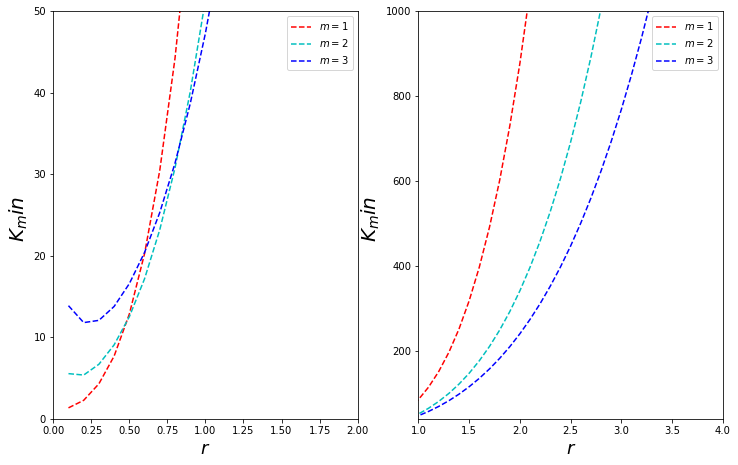

In [28]:
import matplotlib.pyplot as plt  
fig = plt.figure(figsize=(12,12/1.6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)




ax1.plot(r_val , Kmin_m1 , 'r--',label = r'$m=1$')
ax1.plot(r_val , Kmin_m2 , 'c--',label = r'$m=2$')
ax1.plot(r_val , Kmin_m3 , 'b--',label = r'$m=3$')


ax1.set_xlabel(r'$r$', fontsize = 18)
ax1.set_ylabel(r'$K_min$  ' , fontsize = 20)

ax1.set_ylim(0,50)
ax1.set_xlim(0,2)

ax1.legend()


ax2.plot(r_val , Kmin_m1 , 'r--',label = r'$m=1$')
ax2.plot(r_val , Kmin_m2 , 'c--',label = r'$m=2$')
ax2.plot(r_val , Kmin_m3 , 'b--',label = r'$m=3$')


ax2.set_xlabel(r'$r$', fontsize = 18)
ax2.set_ylabel(r'$K_min$  ' , fontsize = 20)

ax2.set_ylim(40,1000)
ax2.set_xlim(1,4)

ax2.legend()

In [97]:
K_w = Kminn(5)
K_w[1]

7987.251632122653

In [98]:
G4 = G.subs(No*a**2/(sym.pi**2*D),K_w[1]).subs(alpha,2)
G4


Matrix([
[     (a**2/(b**2*m**2) + 1)**2, -28399.1169142139/(pi**2*m**2),                             0],
[-28399.1169142139/(pi**2*m**2),   (16*a**2/(b**2*m**2) + 1)**2, -30671.046267351/(pi**2*m**2)],
[                             0,  -30671.046267351/(pi**2*m**2),  (81*a**2/(b**2*m**2) + 1)**2]])

In [103]:
eq1 =sym.Eq(lhs[0,0],0)
eq2 =sym.Eq(lhs[1,0],0) 
eq3 =sym.Eq(lhs[2,0],0)
display(eq1)
display(eq2)
display(eq3)

Eq(a_m1*(a**2/(b**2*m**2) + 1)**2 - 28399.1169142139*a_m2/(pi**2*m**2), 0)

Eq(-28399.1169142139*a_m1/(pi**2*m**2) + a_m2*(16*a**2/(b**2*m**2) + 1)**2 - 30671.046267351*a_m3/(pi**2*m**2), 0)

Eq(-30671.046267351*a_m2/(pi**2*m**2) + a_m3*(81*a**2/(b**2*m**2) + 1)**2, 0)

In [115]:

Am2_sol = sym.solve(eq1,Am2)
display(Am2_sol)
#eq4 = eq3.subs(Am2,Am2_sol)
#Am3_sol =sym.solve(eq4,Am3)
#display(Am3_sol)

[0.000347532088089316*a_m1*(a**2 + b**2*m**2)**2/(b**4*m**2)]